In [1]:
!unzip "/content/Files.zip" -d "/content/Files"

Archive:  /content/Files.zip
  inflating: /content/Files/Example_Technical_Skills.csv  
  inflating: /content/Files/__MACOSX/._Example_Technical_Skills.csv  
  inflating: /content/Files/Raw_Skills_Dataset.csv  
  inflating: /content/Files/__MACOSX/._Raw_Skills_Dataset.csv  


In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_skills_data = pd.read_csv("/content/Files/Raw_Skills_Dataset.csv")
raw_skills_data

,RAW DATA
0,What ifs
1,seniority
2,familiarity
3,functionalities
4,Lambdas
...,...
34111,negotiation
34112,deadlines
34113,"Self-motivated, enthusiastic and strong drive"
34114,negotiation


In [4]:
raw_skills_data.shape

(34116, 1)

In [5]:
example_technical_skills = pd.read_csv("/content/Files/Example_Technical_Skills.csv")
example_technical_skills.head(10)

,Technology Skills
0,SAP Fiori Developer
1,Oracle Instance Management & Strategy
2,Boomi Master Data Management
3,Digital Manufacturing on Cloud ( DMC)
4,DevOps
5,CA SAM
6,OpenShift
7,Acxiom Data Analytics
8,SAP Digital Boardroom
9,Seeburger BIS


In [6]:
example_technical_skills.shape

(979, 1)

In [7]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
def preprocess(text):
    text = decontracted(text)
    text = text.lower()
    text = " ".join(re.findall(r"[a-zA-Z]+", text))
    return text

In [9]:
print(preprocess("seniority"))

seniority


In [10]:
example_technical_skills.iloc[1]["Technology Skills"]

'Oracle Instance Management & Strategy'

In [11]:
from tqdm import tqdm
preprocess_technical_skills = pd.Series([])

for i in tqdm(range(len(example_technical_skills))):
    txt = preprocess(example_technical_skills.iloc[i]["Technology Skills"])
    preprocess_technical_skills[i] = txt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
100%|██████████| 979/979 [00:00<00:00, 1326.00it/s]


In [12]:
data = pd.DataFrame()
data.insert(len(data.columns),"skills", preprocess_technical_skills)
data.insert(len(data.columns),"istechnical", pd.Series(list(np.ones(len(preprocess_technical_skills))))) 

In [13]:
data

,skills,istechnical
0,sap fiori developer,1.0
1,oracle instance management strategy,1.0
2,boomi master data management,1.0
3,digital manufacturing on cloud dmc,1.0
4,devops,1.0
...,...,...
974,oracle cloud revenue management,1.0
975,oracle ebs grid contral mgt pack,1.0
976,amazon elastic mapreduce emr,1.0
977,apache kudu,1.0


In [14]:
#Texts other than hard skills seems to some sort of data from resume/cv
#So taking some cv data and then using it to mark soft skills
txt = """Enthusiastic with good exposure in creating machine learning models, retraining systems and transforming data science prototypes 
to production-grade solutions. Consistently optimize and improve solutions for real-world problem statements by employing statistical 
methods and designs to yield real gains from model changes. Lifelong learner, ability to work with minimum guidance. 
A skilled developer with proven expertise in using new tools and technical developments to drive improvements throughout 
a entire software development lifecycle. Having extensive industry and full life cycle experience in a based environment, 
along with exceptional analytical, design and problem-solving capabilities. Excellent communication skills and able to work a
longside support teams and the community to define and refine new functionality. Looking for a ambitious company which will 
challenge my developer and problem solving skills and allow me to continue to develop my knowledge and potential. 
Professional with 5+ years of experience in and reporting. Seeking to enhance for Fiscal Ally Inc. At Slingshot Motion Ltd., 
designed a model based on requirements that helped boost efficiency 27%. Led development of 10 database projects for customers. 
Completed projects on time and 15% under budget. Used dialogue-mapping to gather requirements to 98% customer satisfaction. 
Used to boost productivity and cut production costs 10. Bachelor's degree in Finance Excellent experience of handling 
Business Intelligence Tools and Dashboard Reports Skilled at consolidating and analyzing financial data
Highly capable of Budgeting, Financial Forecasting, and Modelling tools Master's degree in Accounting|Senior Accountant with 6 years of 
accounting experience|Capable of handling Accounting Operations and Cash Flow Management|Strong knowledge of 
and industry trends.Hands on experience in Proficient in  and  technologies
Sound knowledge of automation frameworks such as Expert knowledge of scripting in  Certified Marketing Professional with Masters degree in Marketing & Sales
Experience in Offline & Online Marketing activities Seeking a position of Marketing Manager to implement innovative marketing strategies & utilize 5+ years
of experience. Proven experience of creating a pool of potential customers across domainsMajor skills include pre-sales proposals, handling customer 
conflict, identifying new business opportunities, maintaining client relationship, & excellent customer service
Human Resource graduate|People Oriented person with strong Communication and Interpersonal skills Well-acquainted with HR databases, Hiring procedure, 
Recruitment activities, Interviewing candidates, Employee Engagement|Excellent Negotiation skills
Seeking the position of Operations Manager|Strong operational, analytical, & numerical skills|Exceptional knowledge of Financial Management, 
Strategic Initiatives, & Business Processes|Ability to coordinate department operations & achieve set targets
Organized, top performer and goal-driven individual with one year of experience in working with the key stakeholders and communicating between
 managerial and technical levels of an organization. 
Skilled at using data-modelling to build a competitive advantage. 
Looking to utilize my technology and leadership skills in an esteemed organization. Well versed with research-oriented marketing abilities and 
product analysis. 
Tech-savvy and a fast learner with innate communication skills and natural curiosity for product marketing
Looking for an entry-level position in Xyz domain ( name of the marketing domain) where I can utilize my extensive knowledge about the area gained during my MBA degree. Well versed with market research and excellence in creating brand awareness strategies. 
Proficient in English language skills to convince potential customers and clients.
"""

In [15]:
txt = preprocess(txt)
print(txt)

enthusiastic with good exposure in creating machine learning models retraining systems and transforming data science prototypes to production grade solutions consistently optimize and improve solutions for real world problem statements by employing statistical methods and designs to yield real gains from model changes lifelong learner ability to work with minimum guidance a skilled developer with proven expertise in using new tools and technical developments to drive improvements throughout a entire software development lifecycle having extensive industry and full life cycle experience in a based environment along with exceptional analytical design and problem solving capabilities excellent communication skills and able to work a longside support teams and the community to define and refine new functionality looking for a ambitious company which will challenge my developer and problem solving skills and allow me to continue to develop my knowledge and potential professional with years 

In [16]:
listOfSoftSkills = txt.split(" ")
#removing words having length less than 3
listOfSoftSkills = list(set(filter(lambda x: len(x) > 3, listOfSoftSkills)))

In [17]:
len(listOfSoftSkills)

255

In [18]:
import nltk
bigrm = list(set(nltk.bigrams(txt.split())))

In [19]:
listOfSoftSkills.extend(map(lambda x : x[0] + " " + x[1], bigrm))
len(listOfSoftSkills)

736

In [20]:
data_nontechnical = pd.DataFrame()
data_nontechnical.insert(len(data_nontechnical.columns),"skills", listOfSoftSkills)
data_nontechnical.insert(len(data_nontechnical.columns),"istechnical", pd.Series(list(np.zeros(len(listOfSoftSkills))))) 

In [21]:
data_nontechnical.columns = data.columns
all_data = pd.concat([data, data_nontechnical], ignore_index=True)

In [22]:
all_data

,skills,istechnical
0,sap fiori developer,1.0
1,oracle instance management strategy,1.0
2,boomi master data management,1.0
3,digital manufacturing on cloud dmc,1.0
4,devops,1.0
...,...,...
1710,certified marketing,0.0
1711,developer and,0.0
1712,awareness strategies,0.0
1713,my technology,0.0


In [23]:
all_data = all_data.sample(frac = 1)
all_data.head(10)

,skills,istechnical
846,cjett,1.0
314,hp cloud computing,1.0
209,ms bot framework,1.0
1121,communicating,0.0
1268,the area,0.0
1482,and a,0.0
1462,position in,0.0
1420,fiscal ally,0.0
1202,include,0.0
189,oracle ebs access control,1.0


In [ ]:
#using basic average word2vec

In [28]:
import spacy

In [26]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [34]:
df = pd.DataFrame()

In [35]:
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for skill in tqdm(list(all_data['skills'])):
    doc1 = nlp(skill) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        mean_vec1 += vec1
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['skills_features'] = list(vecs1)


100%|██████████| 1715/1715 [00:21<00:00, 78.28it/s]


In [36]:
df.head()

,skills_features
0,"[0.3739192485809326, -2.6648411750793457, -0.2..."
1,"[1.8502923846244812, -1.048326849937439, -3.46..."
2,"[0.6287412047386169, -2.454175889492035, -4.85..."
3,"[4.232112884521484, -1.7155683040618896, -1.06..."
4,"[-2.3208261132240295, -2.898141533136368, 2.04..."


In [38]:
df = pd.DataFrame(df.skills_features.values.tolist(), index = df.index)

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.373919,-2.664841,-0.254513,0.216721,2.192356,5.312056,3.007055,-0.457395,-0.320134,3.042696,...,-0.289361,-0.932355,-1.525015,-1.635184,0.145763,1.261120,-1.382012,4.053469,1.345618,1.562481
1,1.850292,-1.048327,-3.465765,-0.194491,-2.809851,7.288293,1.245318,5.896878,3.192288,10.281281,...,-1.069486,-4.374330,-2.276967,-3.147017,0.557235,-1.160870,-1.775461,5.366649,0.698060,1.715167
2,0.628741,-2.454176,-4.851259,0.043622,4.580083,-1.610878,-1.614048,4.312735,2.842611,8.269864,...,-1.439237,-1.107230,-1.861414,-0.522693,-0.620139,3.201579,0.442634,7.345873,-1.989595,5.814771
3,4.232113,-1.715568,-1.064857,-1.040174,1.803473,0.109352,4.853692,0.433616,-2.537785,0.568022,...,-1.992535,0.105701,-1.377385,-0.599239,2.900533,-2.627160,1.481500,2.538228,-0.810288,-0.225202
4,-2.320826,-2.898142,2.046710,-1.856292,2.791682,0.037478,2.629689,1.406566,1.540464,0.889842,...,-2.599974,-1.583284,4.094163,-3.094185,0.349687,0.305298,0.453491,7.936039,2.682237,3.004897


In [40]:
df.insert(len(df.columns),"istechnical", list(all_data.istechnical))

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,istechnical
0,0.373919,-2.664841,-0.254513,0.216721,2.192356,5.312056,3.007055,-0.457395,-0.320134,3.042696,...,-0.932355,-1.525015,-1.635184,0.145763,1.261120,-1.382012,4.053469,1.345618,1.562481,1.0
1,1.850292,-1.048327,-3.465765,-0.194491,-2.809851,7.288293,1.245318,5.896878,3.192288,10.281281,...,-4.374330,-2.276967,-3.147017,0.557235,-1.160870,-1.775461,5.366649,0.698060,1.715167,1.0
2,0.628741,-2.454176,-4.851259,0.043622,4.580083,-1.610878,-1.614048,4.312735,2.842611,8.269864,...,-1.107230,-1.861414,-0.522693,-0.620139,3.201579,0.442634,7.345873,-1.989595,5.814771,1.0
3,4.232113,-1.715568,-1.064857,-1.040174,1.803473,0.109352,4.853692,0.433616,-2.537785,0.568022,...,0.105701,-1.377385,-0.599239,2.900533,-2.627160,1.481500,2.538228,-0.810288,-0.225202,0.0
4,-2.320826,-2.898142,2.046710,-1.856292,2.791682,0.037478,2.629689,1.406566,1.540464,0.889842,...,-1.583284,4.094163,-3.094185,0.349687,0.305298,0.453491,7.936039,2.682237,3.004897,0.0


In [42]:
df.shape

(1715, 97)

In [51]:
y = df['istechnical']
X = df.drop(['istechnical'], axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=15)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold

In [59]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

For values of alpha =  0.01 The log loss is: 0.25252017853020864
For values of alpha =  0.1 The log loss is: 0.21924118517695002
For values of alpha =  1 The log loss is: 0.27023672634148754
For values of alpha =  10 The log loss is: 0.39011033972030296
For values of alpha =  100 The log loss is: 0.534270338824966
For values of alpha =  1000 The log loss is: 0.6523067606468786
For values of alpha =  10000 The log loss is: 0.6912602099774463


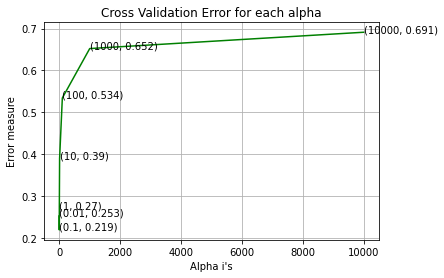

For values of best alpha =  0.1 The train log loss is: 0.246425627531419
For values of best alpha =  0.1 The test log loss is: 0.21924118517695002
Total number of data points : 343


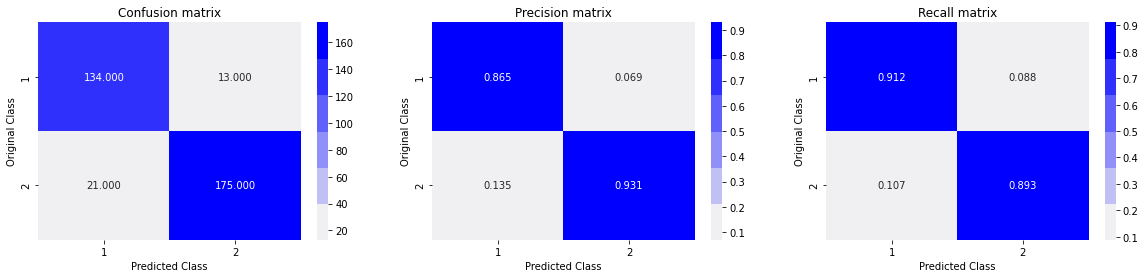

Macro f1_score = 0.9114583333333334


In [64]:
alpha = [10 ** x for x in range(-2, 5)] 

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    predict_y = clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)

predict_y = clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("Macro f1_score = {}".format(f1_score(y_test, predicted_y)))

In [65]:
raw_skills_data.head(10)

,RAW DATA
0,What ifs
1,seniority
2,familiarity
3,functionalities
4,Lambdas
5,Java Streams
6,Object Oriented analysis
7,Relational Databases
8,SQL
9,ORM


In [66]:
nlp('I am alive')

I am alive

In [67]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')
def prediction_skills(text):
    text = preprocess(text)
    doc1 = nlp(text) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        mean_vec1 += vec1
    mean_vec1 = mean_vec1.mean(axis=0)
    return mean_vec1

In [79]:
raw_skills_data

,RAW DATA
0,What ifs
1,seniority
2,familiarity
3,functionalities
4,Lambdas
...,...
34111,negotiation
34112,deadlines
34113,"Self-motivated, enthusiastic and strong drive"
34114,negotiation


In [98]:
data = raw_skills_data['RAW DATA'].iloc[59]
print(data)
val = prediction_skills(raw_skills_data['RAW DATA'].iloc[59])
val = val.reshape(1, -1)
clf.predict(val)

each following distributed technologies


array([0.])

In [99]:
data = raw_skills_data['RAW DATA'].iloc[509]
print(data)
val = prediction_skills(raw_skills_data['RAW DATA'].iloc[509])
val = val.reshape(1, -1)
clf.predict(val)

Windows environments


array([1.])